## Importing Packages and Dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [35]:
df = pd.read_csv('hotel_bookings.csv')

## Performing EDA

In [36]:
def impute_median(series):
    return series.fillna(series.median())

In [37]:
#Fill children column with the median of the children
df.children = df['children'].transform(impute_median)

In [38]:
# Remove rows with NaN in the 'country' column from the original DataFrame
df.dropna(subset=['country'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [39]:
df['agent_encoded'] = df['agent'].isnull().astype(int)

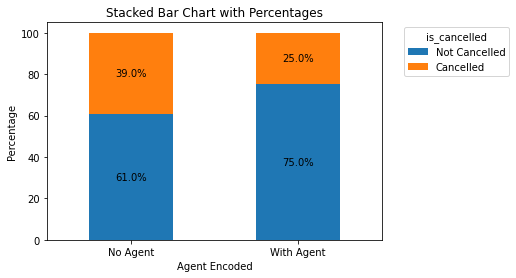

In [40]:
grouped = df.groupby(['agent_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Agent', 'With Agent']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Agent Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [41]:
df['company_encoded'] = df['company'].isnull().astype(int)

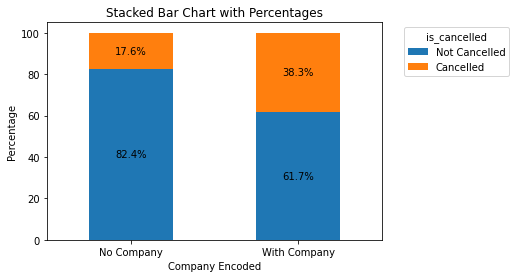

In [42]:
grouped = df.groupby(['company_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Company', 'With Company']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Company Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [43]:
# Count the frequency of each unique value in the "babies" column
babies_counts = df["babies"].value_counts()
babies_counts

0     117988
1        898
2         14
10         1
9          1
Name: babies, dtype: int64

In [44]:
# Count the frequency of each unique value in the "adults" column
adult_counts = df["adults"].value_counts()
adult_counts

2     89498
1     22735
3      6198
0       393
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [45]:
from scipy.stats import chi2_contingency

# List of features (other than 'deposit_type') to test
feature_list = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type', 'reservation_status','company_encoded','agent_encoded']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared Statistic', 'P-value'])

# Loop through the list of features and perform chi-squared tests
for feature in feature_list:
    contingency_table = pd.crosstab(df['is_canceled'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)

# Display the results as a table (ascending)
print(results_df)

/var/folders/pc/n2x9dfs54cvgy_n64kqgj4kr0000gn/T/ipykernel_64920/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
/var/folders/pc/n2x9dfs54cvgy_n64kqgj4kr0000gn/T/ipykernel_64920/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
/var/folders/pc/n2x9dfs54cvgy_n64kqgj4kr0000gn/T/ipykernel_64920/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=T

                      Feature  Chi-Squared Statistic        P-value
0           arrival_date_year              76.864320   2.037629e-17
1          arrival_date_month             562.212171  1.679657e-113
2   arrival_date_day_of_month             321.887339   1.245444e-50
3    arrival_date_week_number            1096.605323  1.514505e-195
4                        meal             304.270625   1.298819e-64
5                     country           15434.681533   0.000000e+00
6              market_segment            8394.485010   0.000000e+00
7        distribution_channel            3653.712427   0.000000e+00
8          reserved_room_type             637.147604  2.215793e-131
9          assigned_room_type            4841.145584   0.000000e+00
10              customer_type            2254.871846   0.000000e+00
11               deposit_type           27548.334078   0.000000e+00
12         reservation_status          118902.000000   0.000000e+00
13            company_encoded            1141.70

/var/folders/pc/n2x9dfs54cvgy_n64kqgj4kr0000gn/T/ipykernel_64920/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)


In [46]:
df['arrival_date'] = df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

In [47]:
df['arrival_date_w_year'] = df['arrival_date'].astype(str) + '-' + df['arrival_date_year'].astype(str)

In [48]:
df['arrival_date_w_year'] = pd.to_datetime(df['arrival_date_w_year'], format='%B-%d-%Y')

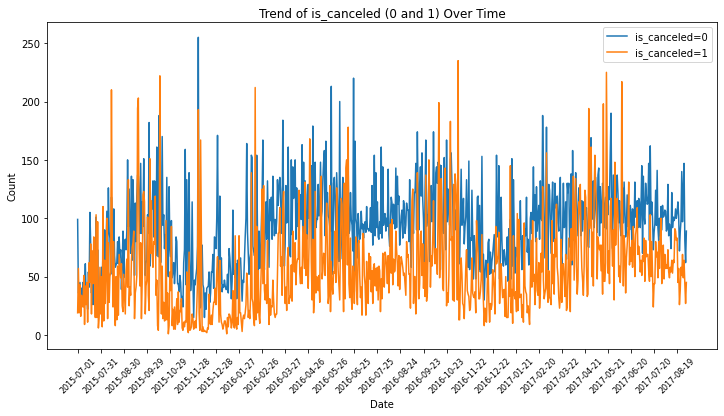

In [49]:
date_cancel_counts = df.groupby(['arrival_date_w_year', 'is_canceled']).size().unstack(fill_value=0)

# Create a new column that calculates the total counts for each date
date_cancel_counts['total'] = date_cancel_counts.sum(axis=1)

# Plot the trendlines
plt.figure(figsize=(12, 6))
plt.plot(date_cancel_counts.index, date_cancel_counts[0], label='is_canceled=0', linestyle='-')
plt.plot(date_cancel_counts.index, date_cancel_counts[1], label='is_canceled=1', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend of is_canceled (0 and 1) Over Time')

# Show only year/month as x-axis labels for readability
plt.xticks(date_cancel_counts.index[::30], rotation=45, fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [50]:
dates_with_condition = []

# Iterate through the rows of date_cancel_counts
for index, row in date_cancel_counts.iterrows():
    # Check if the count for is_canceled=1 is higher than the count for is_canceled=0
    if row[1] > row[0]:
        dates_with_condition.append(index)

formatted_dates = [date.strftime('%Y-%m-%d') for date in dates_with_condition]

# Print the formatted dates
print("Dates where is_canceled=1 count is higher than is_canceled=0 count:")
print(formatted_dates)

Dates where is_canceled=1 count is higher than is_canceled=0 count:
['2015-07-02', '2015-07-09', '2015-07-13', '2015-07-16', '2015-07-18', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-25', '2015-07-27', '2015-07-30', '2015-08-03', '2015-08-13', '2015-08-14', '2015-08-27', '2015-08-30', '2015-09-05', '2015-09-10', '2015-09-17', '2015-09-18', '2015-09-24', '2015-09-26', '2015-10-03', '2015-10-05', '2015-10-16', '2015-10-17', '2015-10-24', '2015-11-13', '2015-12-08', '2015-12-09', '2016-01-22', '2016-01-27', '2016-02-17', '2016-02-21', '2016-02-26', '2016-02-28', '2016-03-25', '2016-04-14', '2016-04-19', '2016-04-24', '2016-04-28', '2016-05-13', '2016-05-24', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-12', '2016-06-14', '2016-06-15', '2016-06-17', '2016-07-07', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-24', '2016-09-30', '2016-10-01', '2016-10-13', '2016-10-15', '2016-10-21', '2016-10-22', '2016-10-27', '2016-10-28', '2016-11-01', '2016-11-03', '2016-11-04', '2016-1

In [51]:
# Define the columns you want to select
columns_to_select = ['lead_time', 'country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type', 'agent_encoded', 'company_encoded', 'arrival_date_week_number']

# Create the new DataFrame by selecting the desired columns
final_df = df[columns_to_select]


In [52]:
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding
transformed_df = final_df[['lead_time', 'agent_encoded', 'company_encoded']].copy()
transformed_df['arrival_date_week_number'] = df['arrival_date_week_number']
attributes_to_encode = ['country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type']
for attribute in attributes_to_encode:
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(final_df[[attribute]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([attribute]))

    # Concatenate the one-hot encoded features with the original dataframe
    transformed_df = pd.concat([transformed_df, onehot_encoded_df], axis=1)
    print(transformed_df.shape)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_df[['lead_time', 'arrival_date_week_number']])
transformed_df[['lead_time', 'arrival_date_week_number']] = scaled_data

/Users/wowmiir/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(118902, 181)
(118902, 184)
(118902, 192)


/Users/wowmiir/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/wowmiir/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/wowmiir/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(118902, 204)
(118902, 209)
(118902, 213)


/Users/wowmiir/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/wowmiir/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Split data into Train-Test Sets**

In [53]:
X = transformed_df
y = df['is_canceled']
print(X.shape, y.shape)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(118902, 213) (118902,)


# **Random Forest Model**

In [54]:
#Testing RF with Default Parameters

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(oob_score=True)
rd_clf.fit(X_train, y_train)
y_pred_rd_clf = rd_clf.predict(X_test)

#Model Evaluation
print(f"Random Forest OOB Score is : {rd_clf.oob_score_}")

prec_rd_clf = precision_score(y_test, y_pred_rd_clf)
print(f"Precision Score of Random Forest is : {prec_rd_clf}")

clf_report = classification_report(y_test, y_pred_rd_clf)
print(f"Classification Report : \n{clf_report}")

conf = confusion_matrix(y_test, y_pred_rd_clf)
print(f"Confusion Matrix : \n{conf}")

Random Forest OOB Score is : 0.8274408385109492
Precision Score of Random Forest is : 0.7831757807825774
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     14862
           1       0.78      0.73      0.76      8919

    accuracy                           0.82     23781
   macro avg       0.81      0.81      0.81     23781
weighted avg       0.82      0.82      0.82     23781

Confusion Matrix : 
[[13050  1812]
 [ 2374  6545]]


In [36]:
# Hyperparameter Tuning -> Finding best parameters

from sklearn.model_selection import RandomizedSearchCV 

param_random = { 
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3,6,9],
    'max_leaf_nodes': [3,6,9]
    }

randomized_search = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=param_random, n_iter=20, cv=10, random_state=0, scoring="precision") 
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", randomized_search.best_params_)

Best Hyperparameters: {'n_estimators': 150, 'max_leaf_nodes': 3, 'max_depth': 3, 'criterion': 'gini'}


In [38]:
# Finding Best Estimators and Best Scores

print("Best estimators found: ", randomized_search.best_estimator_)
print("Best score found: ", randomized_search.best_score_)

Best estimators found:  RandomForestClassifier(max_depth=3, max_leaf_nodes=3, n_estimators=150)
Best score found:  0.9988563255753391


In [32]:
#Testing RF with Tuned Hyperparameters

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(oob_score=True, max_depth=3, max_leaf_nodes=3, n_estimators=150)
rd_clf.fit(X_train, y_train)
y_pred_rd_clf = rd_clf.predict(X_test)

#Model Evaluation
print(f"Random Forest OOB Score is : {rd_clf.oob_score_}")

prec_rd_clf = precision_score(y_test, y_pred_rd_clf)
print(f"Precision Score of Random Forest is : {prec_rd_clf}")

clf_report = classification_report(y_test, y_pred_rd_clf)
print(f"Classification Report : \n{clf_report}")

conf = confusion_matrix(y_test, y_pred_rd_clf)
print(f"Confusion Matrix : \n{conf}")

Random Forest OOB Score is : 0.7480997886901946
Precision Score of Random Forest is : 0.9954273654590221
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14862
           1       1.00      0.32      0.48      8919

    accuracy                           0.74     23781
   macro avg       0.85      0.66      0.66     23781
weighted avg       0.82      0.74      0.70     23781

Confusion Matrix : 
[[14849    13]
 [ 6089  2830]]
